### 0. Usual imports

In [139]:
import pandas as pd
import datetime
from datetime import date, timedelta

### 1. Loading Datasets and apply basic preprocessing

#### 1.1. Load the dataset

In [140]:

# dataset
dataset = pd.read_csv('../Automating/airflow/data/Dataset/data.csv', parse_dates=['date'])
dataset['period']=dataset['date'].dt.to_period('M')
dataset.sort_values(by="date" ,inplace=True)
# one_month = list(set(dataset["period"]))[2]
# [dataset["period"]== one_month]
dataset = dataset.transpose()
dataset.columns=[ i for i in range(1,len(dataset.columns)+1)]
df = dataset.transpose()


#### 1.2 On ajoute une colonne pour la variable ressource

In [141]:
df['ressource']=[df.link[i].split('/')[2].replace('www.','').replace('.com','').replace('.ma','') for i in range(1, len(df.link)+1)]

In [142]:
topics = pd.read_csv('../Automating/airflow/data/Outputs/topics.csv', index_col='doc_num')
# appriori = pd.read_csv('../Automating/airflow/data/Outputs/appriori.csv')
trends = pd.read_csv('../Automating/airflow/data/Outputs/trends.csv')
trends.fillna(0, inplace=True)

In [143]:
topics=topics.reset_index().drop(['doc_num'], axis=1)

### 2. Getting general information about the dataset

In [163]:
# Get the count of each ressource
df.ressource.value_counts().to_csv('./Dahboarding App/static/ressources.csv')

In [162]:
df.ressource.value_counts().transpose()

lematin      379
lavieeco      71
challenge     39
Name: ressource, dtype: int64

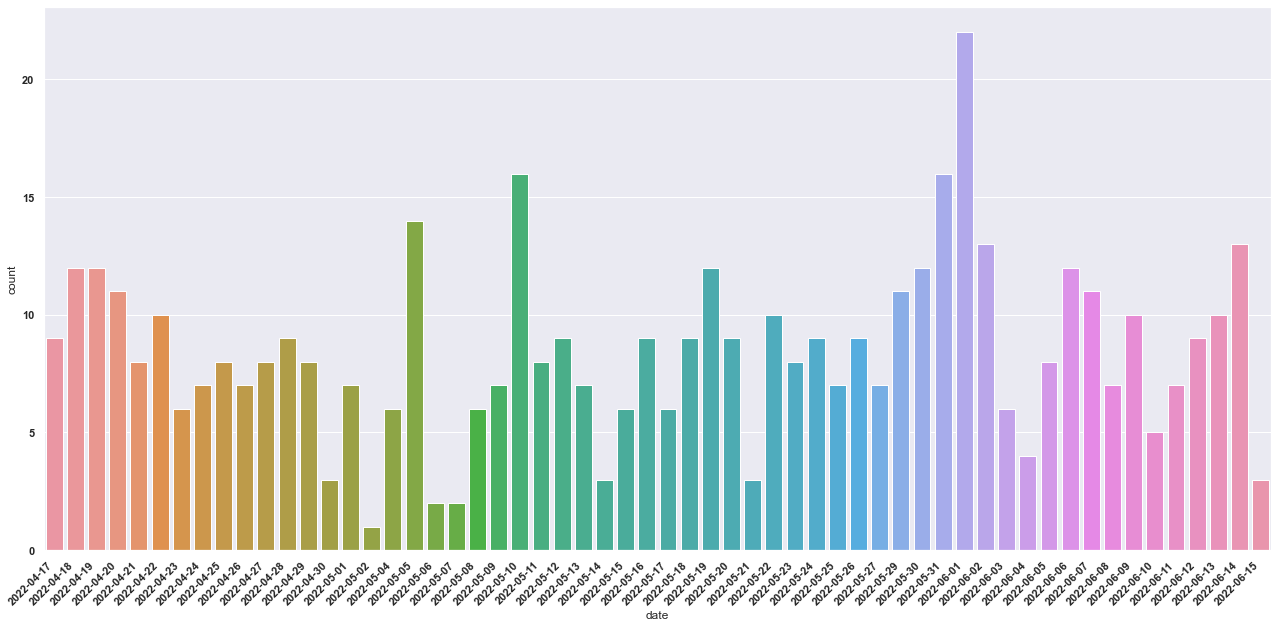

In [145]:

# get th count of each date
counts_per_date = df.date.value_counts()
# vissualisation of the count of each date and rotation of labels and format of the date using seaborn with a figure size of (12,8)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2})
fig, ax = plt.subplots(figsize=(22, 10))
sns.countplot(ax=ax, x="date", data=df)

# format the date to show only the month and the day
formatted_date = df['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(formatted_date, rotation=45, ha='right')
plt.savefig('./Dahboarding App/static/images/'+'count_by_ressources.png', box_inches='tight')

plt.show()



### 3. Poltting

#### Plotting trends

In [146]:
# range of dates
start = datetime.date(2022, 5, 1)
end = start+timedelta(days=len(trends))
date_range = pd.date_range(start=start, end=end, freq='D')
formatted_date = date_range.strftime('%Y-%m-%d').sort_values().unique()


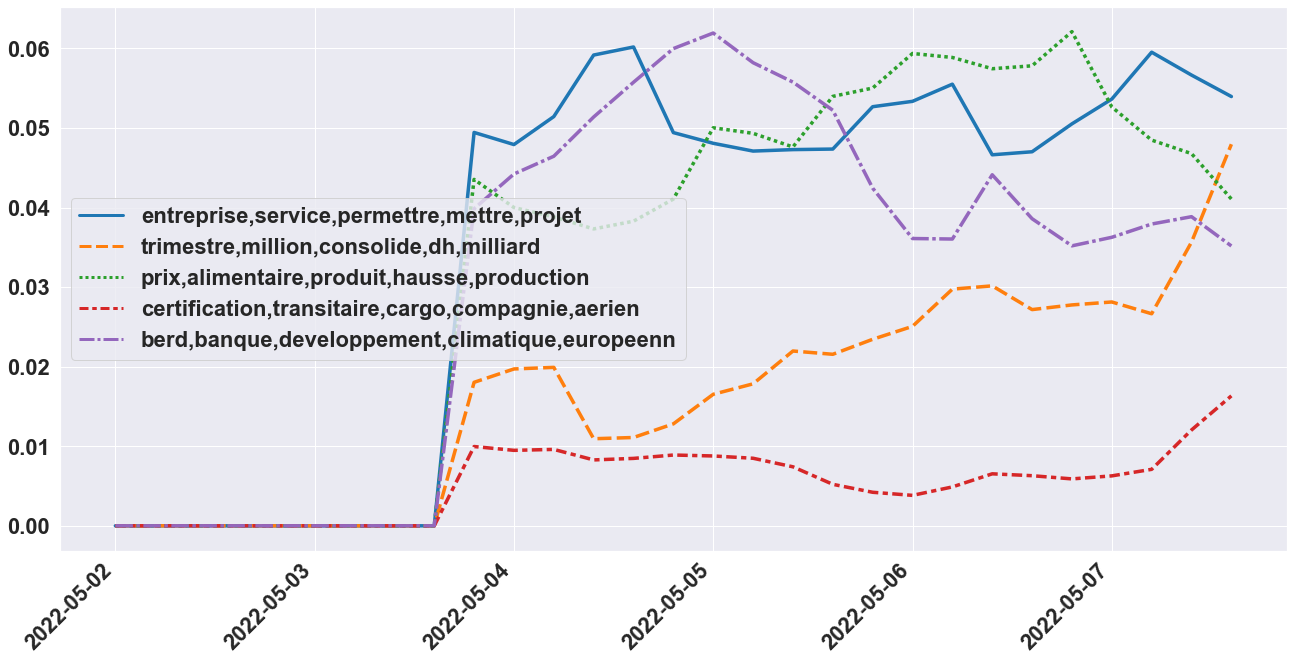

In [161]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_xticklabels(formatted_date, rotation=45, ha='right')

# change font zise of the x and y labels
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)
sns.lineplot(ax=ax ,data=trends, palette="tab10", linewidth=3.5)
plt.savefig('./Dahboarding App/static/images/'+'trends.png', box_inches='tight')

####  Plotting Topics

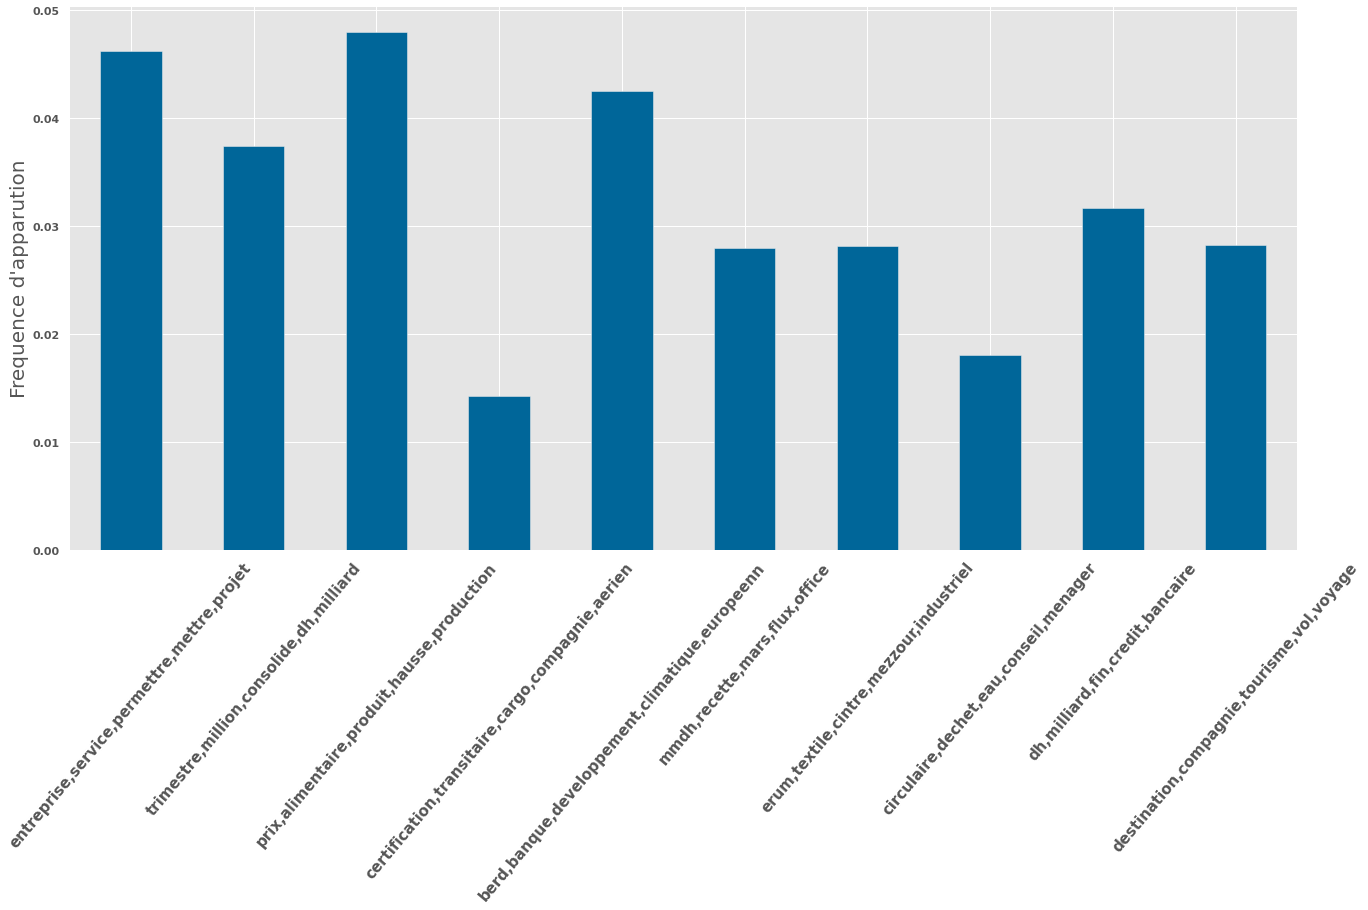

In [152]:

plt.ylabel("Frequence d'apparution", fontsize=20)
plt.xticks(rotation=45,fontsize=15)
# plot the data
plt.style.use('ggplot') 
# change font zise of the x and y labels
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
topics.mean(axis=0).plot(kind='bar',figsize=(22, 10), color='#006699', rot=50) 
plt.savefig('./Dahboarding App/static/images/'+'topics.png', size=(22, 10))
